# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Import Packages

import os
import cv2
import pickle
import random 
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

%matplotlib inline

In [3]:
# Load pickled data

training_file = "traffic-sign-data/train.p"
validation_file = "traffic-sign-data/valid.p"
testing_file = "traffic-sign-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
# Import CSV Labels using Pandas
df = pd.read_csv("signnames.csv")

# Convert DataFrame to dictionary
sign_names = df.set_index("ClassId")["SignName"].to_dict()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Helper Functions
This helper functions are used to select and display an specified number of images from a given image class

In [69]:
# Helper functions to show random images from a selected class

label_data = np.zeros(43)


def selectRandomImages(label_index=0, n_samples=1):
    

    '''
    Helper function to display a specified number of images from a given image class
    
    Inputs:
        label_index: the number of the class to be selected (as in signnames.csv)
        n_samples:   the number of images to be selected
        
        
    Returns:
        images = nparray of randomly selected images from given class in the training set
        image_index = returns indices of all images of the class in the training set
    
    '''
    
    # Determine the indicies of the class images in the training set
    image_index = np.where(y_train == label_index)[0]
    
    # Select a random selection of images from the training set.
    random_images = np.random.choice(image_index, n_samples)
    
    
    return X_train[random_images], image_index






def showRandomImages(label_index=0, n_samples=1):
    '''
    Helper function to display a specified number of images from a given image class
    
    Inputs:
        label_index: the number of the class to be displayed (as in signnames.csv)
        n_samples:   the number of images to be displayed
        
        
    Returns:
        None
    
    '''
    

    # Select random images from class
    random_images, image_index = selectRandomImages(label_index, n_samples)

    
    # Retrieve the text label of the class
    label = sign_names[label_index]
    
    
    # Determine the amount of class images in the training set
    label_data[label_index] = len(image_index)
    
    
    # Print class label and training set data
    print("Label {}: {}".format(label_index, label))
    print("No. of images: {}".format(label_data[label_index]))
    
    # Display selection of images
    f, ax_arr = plt.subplots(1, n_samples, figsize=(10, 20))
        
    try:
        for i, ax in enumerate(ax_arr):
            
            ax.imshow(random_images[i])
            ax.autoscale(True)
            ax.axis('off')
        plt.show()
    
    except:
        
        plt.imshow(random_images[0])
        plt.axis('off')
        plt.show()


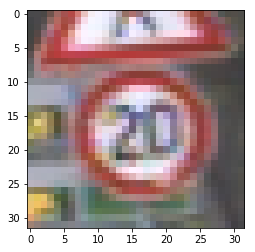

In [76]:
# Select a single and show a random image from class zero

test_image, _ = selectRandomImages(label_index=0, n_samples=1)

plt.imshow(test_image[0])

Label 0: Speed limit (20km/h)
No. of images: 180.0


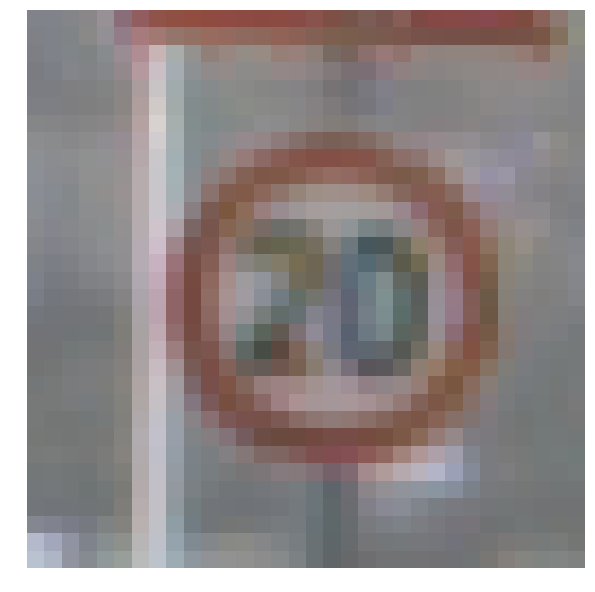

In [74]:
# Show a single random image from class zero

showRandomImages(label_index=0, n_samples=1)

Label 0: Speed limit (20km/h)
No. of images: 180.0


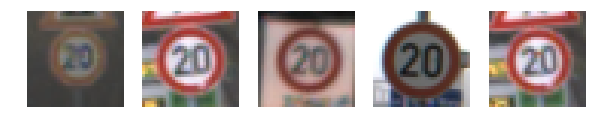

Label 1: Speed limit (30km/h)
No. of images: 1980.0


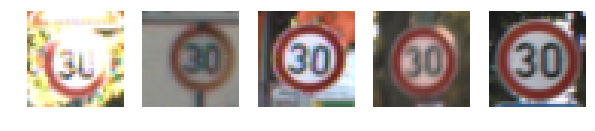

Label 2: Speed limit (50km/h)
No. of images: 2010.0


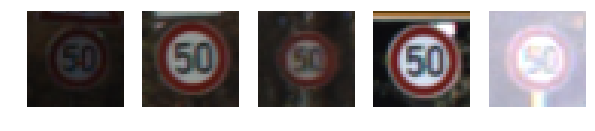

Label 3: Speed limit (60km/h)
No. of images: 1260.0


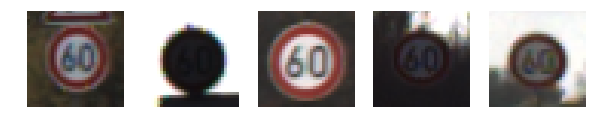

Label 4: Speed limit (70km/h)
No. of images: 1770.0


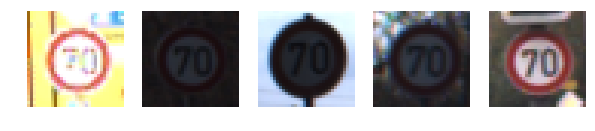

Label 5: Speed limit (80km/h)
No. of images: 1650.0


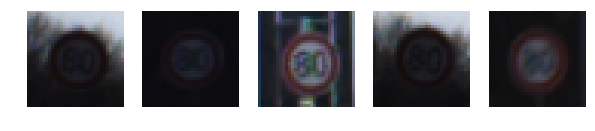

Label 6: End of speed limit (80km/h)
No. of images: 360.0


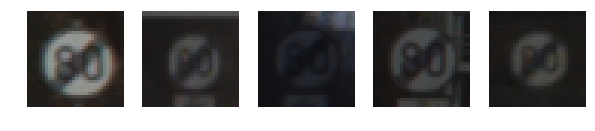

Label 7: Speed limit (100km/h)
No. of images: 1290.0


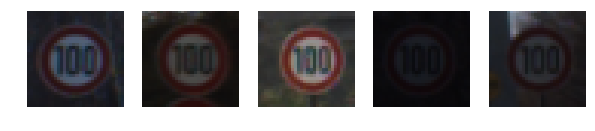

Label 8: Speed limit (120km/h)
No. of images: 1260.0


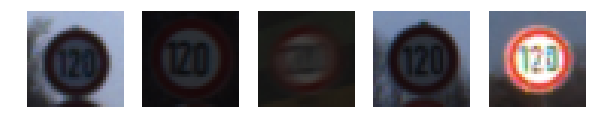

Label 9: No passing
No. of images: 1320.0


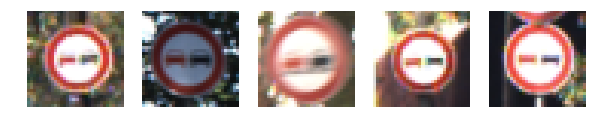

Label 10: No passing for vehicles over 3.5 metric tons
No. of images: 1800.0


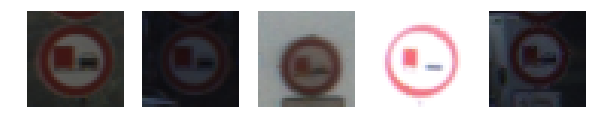

Label 11: Right-of-way at the next intersection
No. of images: 1170.0


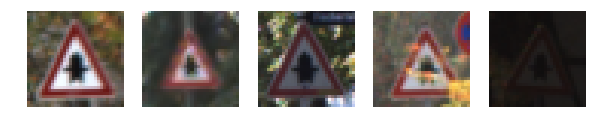

Label 12: Priority road
No. of images: 1890.0


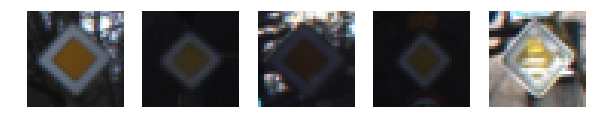

Label 13: Yield
No. of images: 1920.0


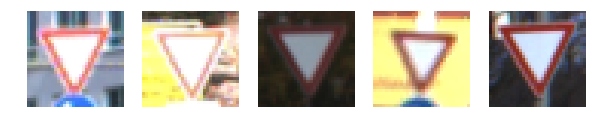

Label 14: Stop
No. of images: 690.0


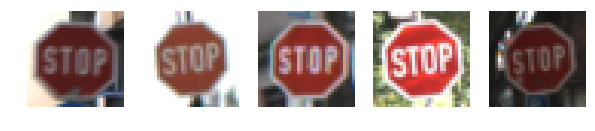

Label 15: No vehicles
No. of images: 540.0


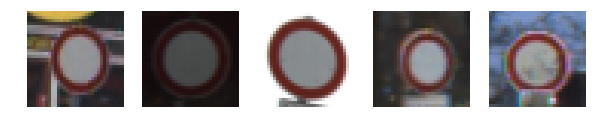

Label 16: Vehicles over 3.5 metric tons prohibited
No. of images: 360.0


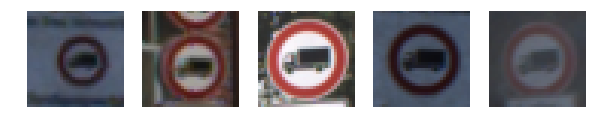

Label 17: No entry
No. of images: 990.0


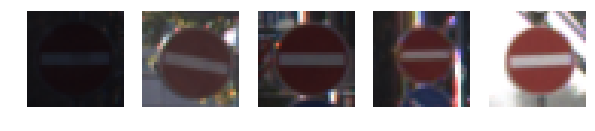

Label 18: General caution
No. of images: 1080.0


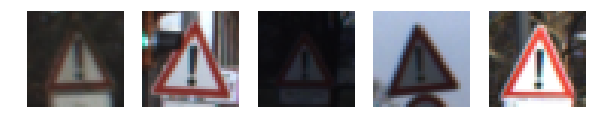

Label 19: Dangerous curve to the left
No. of images: 180.0


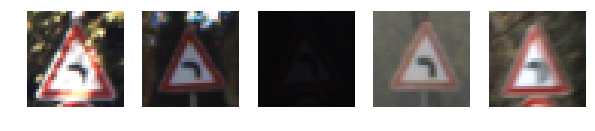

Label 20: Dangerous curve to the right
No. of images: 300.0


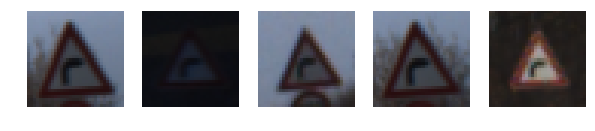

Label 21: Double curve
No. of images: 270.0


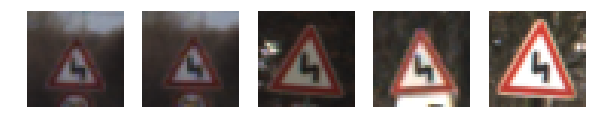

Label 22: Bumpy road
No. of images: 330.0


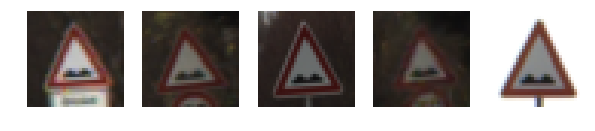

Label 23: Slippery road
No. of images: 450.0


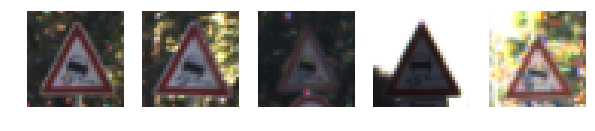

Label 24: Road narrows on the right
No. of images: 240.0


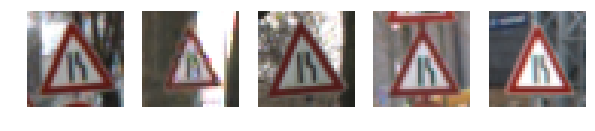

Label 25: Road work
No. of images: 1350.0


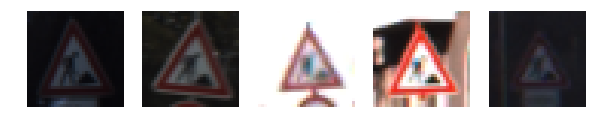

Label 26: Traffic signals
No. of images: 540.0


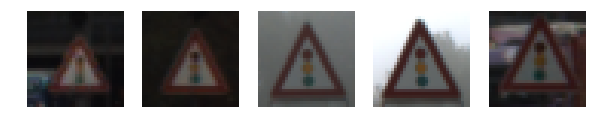

Label 27: Pedestrians
No. of images: 210.0


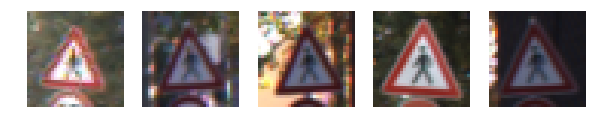

Label 28: Children crossing
No. of images: 480.0


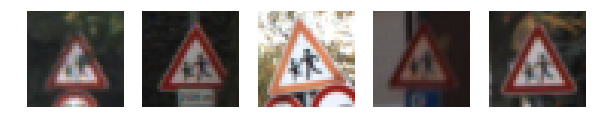

Label 29: Bicycles crossing
No. of images: 240.0


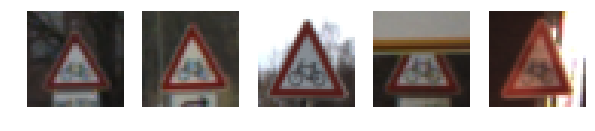

Label 30: Beware of ice/snow
No. of images: 390.0


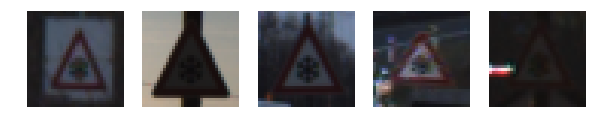

Label 31: Wild animals crossing
No. of images: 690.0


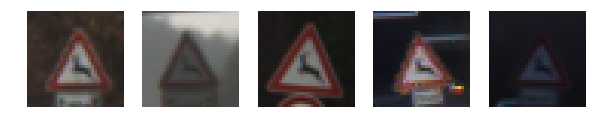

Label 32: End of all speed and passing limits
No. of images: 210.0


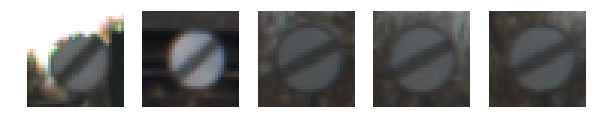

Label 33: Turn right ahead
No. of images: 599.0


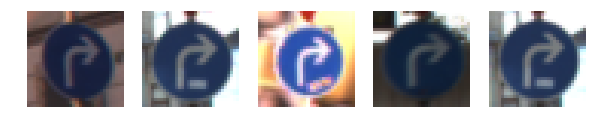

Label 34: Turn left ahead
No. of images: 360.0


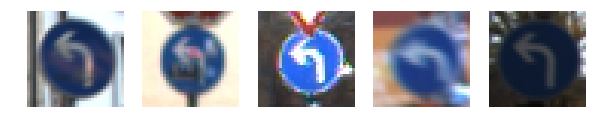

Label 35: Ahead only
No. of images: 1080.0


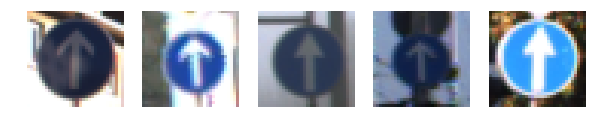

Label 36: Go straight or right
No. of images: 330.0


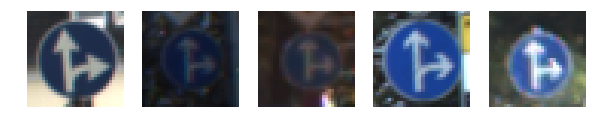

Label 37: Go straight or left
No. of images: 180.0


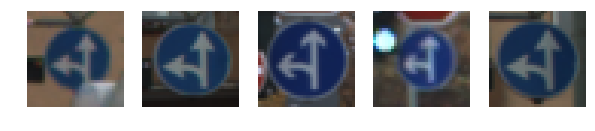

Label 38: Keep right
No. of images: 1860.0


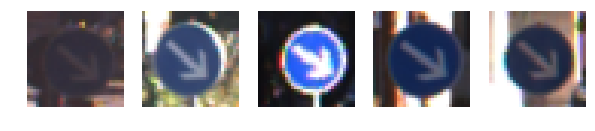

Label 39: Keep left
No. of images: 270.0


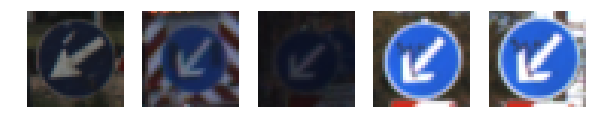

Label 40: Roundabout mandatory
No. of images: 300.0


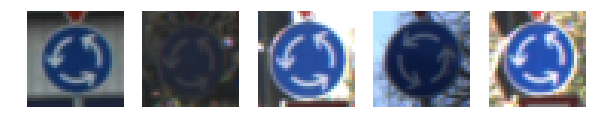

Label 41: End of no passing
No. of images: 210.0


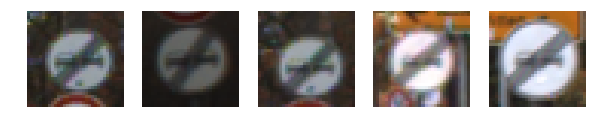

Label 42: End of no passing by vehicles over 3.5 metric tons
No. of images: 210.0


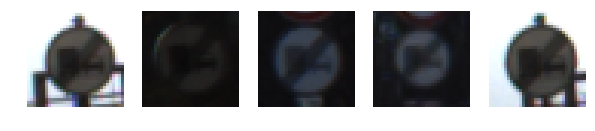

In [75]:
# Display a random selection of images from all classes    

for i in range(n_classes):
    showRandomImages(label_index=i, n_samples=5)


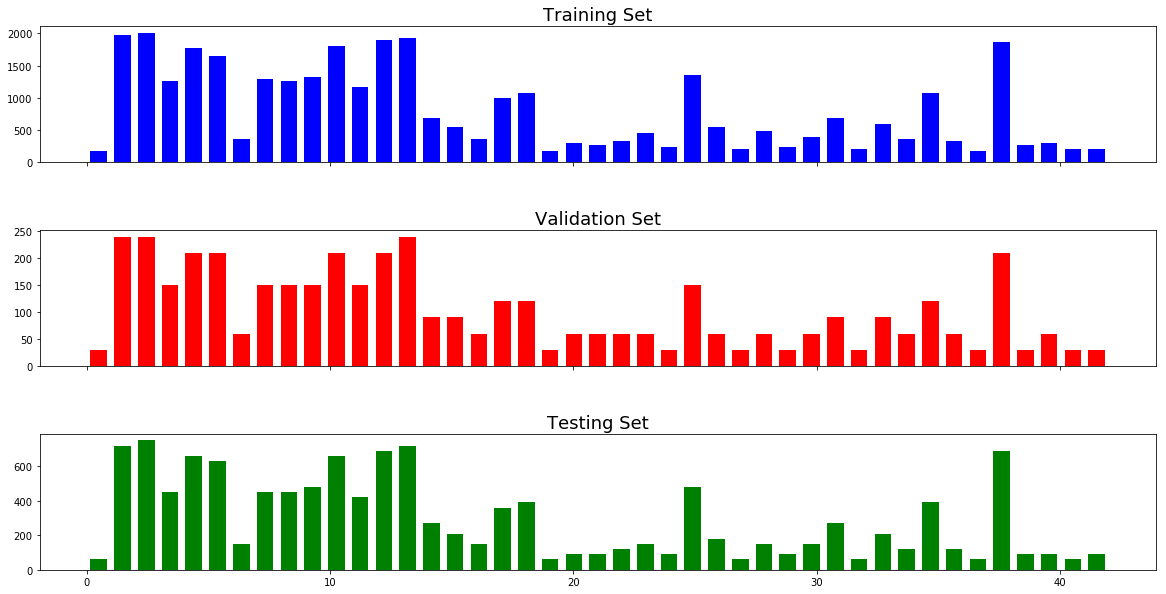

In [80]:
# Visualise the distributions of the data sets
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(20, 10))

ax1.hist(y_train, bins=43, color="blue", rwidth=0.7)
ax2.hist(y_valid, bins=43, color="red", rwidth=0.7)
ax3.hist(y_test, bins=43, color="green", rwidth=0.7)

ax1.set_title("Training Set", fontsize=18)
ax2.set_title("Validation Set", fontsize=18)
ax3.set_title("Testing Set", fontsize=18)

f.subplots_adjust(hspace=0.5)
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Image Normalisation

In [81]:
X_train = (X_train - 128.0) / 128.0
X_valid = (X_valid - 128.0) / 128.0
X_test = (X_test - 128.0) / 128.0

In [82]:
X_train, y_train = shuffle(X_train, y_train)

### Model Hyperparameters

In [83]:
tf.reset_default_graph()

In [84]:
EPOCHS = 45
BATCH_SIZE = 128

keep_prob = tf.placeholder(tf.float32)

### Model Architecture
Base LeNet architecture from class with dropout added.

In [85]:
def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation and Dropout
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation and Dropout
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation and Dropout
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob)


    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation and Dropout
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Features and Labels

In [86]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline

In [87]:
rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [88]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training and Validating the Model

Training...

EPOCH 1 ...
Validation Accuracy = 0.444

EPOCH 2 ...
Validation Accuracy = 0.639

EPOCH 3 ...
Validation Accuracy = 0.757

EPOCH 4 ...
Validation Accuracy = 0.807

EPOCH 5 ...
Validation Accuracy = 0.831

EPOCH 6 ...
Validation Accuracy = 0.860

EPOCH 7 ...
Validation Accuracy = 0.855

EPOCH 8 ...
Validation Accuracy = 0.880

EPOCH 9 ...
Validation Accuracy = 0.893

EPOCH 10 ...
Validation Accuracy = 0.895

EPOCH 11 ...
Validation Accuracy = 0.896

EPOCH 12 ...
Validation Accuracy = 0.897

EPOCH 13 ...
Validation Accuracy = 0.903

EPOCH 14 ...
Validation Accuracy = 0.902

EPOCH 15 ...
Validation Accuracy = 0.916

EPOCH 16 ...
Validation Accuracy = 0.917

EPOCH 17 ...
Validation Accuracy = 0.902

EPOCH 18 ...
Validation Accuracy = 0.911

EPOCH 19 ...
Validation Accuracy = 0.912

EPOCH 20 ...
Validation Accuracy = 0.908

EPOCH 21 ...
Validation Accuracy = 0.920

EPOCH 22 ...
Validation Accuracy = 0.920

EPOCH 23 ...
Validation Accuracy = 0.922

EPOCH 24 ...
Validation Accura

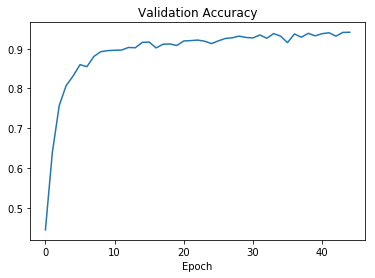

In [89]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    accuracy = []
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        accuracy.append(validation_accuracy)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

        
    saver.save(sess, './lenet')
    print("Model saved")
    
    
    plt.title("Validation Accuracy")
    plt.xlabel("Epoch")
    plt.plot(accuracy)
    plt.show()
    

## Evaluate the Model

In [90]:
# Evaluate the Model

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.930


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [91]:
# German Traffic Sign images from internet
image_urls = ["https://www.autoeurope.com/default/assets/Image/germany-speed-limit-sign.png",
             "https://www.autoeurope.com/default/assets/Image/german-road-signs-pedestrians.png",
             "https://www.autoeurope.com/default/assets/Image/german-road-signs-traffic.png",
             "http://members.iinet.net.au/~felsche/Bernd/SENSE/D-Signs/209.png", 
             "http://members.iinet.net.au/~felsche/Bernd/SENSE/D-Signs/267.png",
             "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTJJH1ww7RLhHMIT1a-2qFSwE17Yd6enG42LhLLe2F4M_RLS01d"]

# Images downloaded and saved manually.

image_list = os.listdir("german-traffic-signs/")

images = np.zeros(shape=(6,32,32,3))




for i,file in enumerate(image_list):

    img_dir = "german-traffic-signs/" + file    
    image = mpimg.imread(img_dir)
        
    # Recolor and resize images
    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    if image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
    
    image = cv2.resize(image, (32, 32))
        
    # Convert images to nparrays
    image = np.asarray(image)    
    images[i] = image



### Visualise the New Images

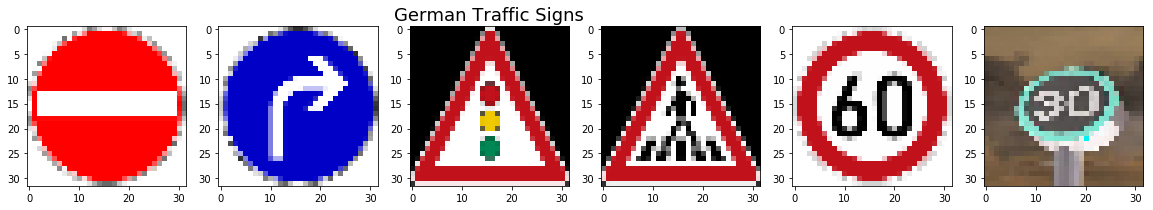

In [92]:
# Visualise new traffic sign images
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 10))

ax1.imshow(images[0])
ax2.imshow(images[1])
ax3.imshow(images[2])
ax4.imshow(images[3])
ax5.imshow(images[4])
ax6.imshow(images[5])

ax3.set_title("German Traffic Signs", fontsize=18)

plt.show()

### Predict the Sign Type for Each Image

In [93]:
# Restore tensorflow model, and predict sign labels and probabilities


def predict_signs(image):
    with tf.Session() as sess:
        
        # Restore Tensorflow model
        saver.restore(sess, "./lenet")
        
        # Reshape image to batch size of one
        image = image.reshape(1, 32,32,3)

        
        softmax = tf.nn.softmax(logits)
        result = sess.run(softmax, feed_dict={x: image, keep_prob: 1.0})

        values, indices = tf.nn.top_k(result, 5)
        
        probs = sess.run(values)
        predictions = sess.run(indices)

        return probs, predictions

    

label_probs = []
label_predictions = [] 

for image in images:
    
    probs, predictions = predict_signs(image)
    label_probs.append(probs)
    label_predictions.append(predictions[0])

    

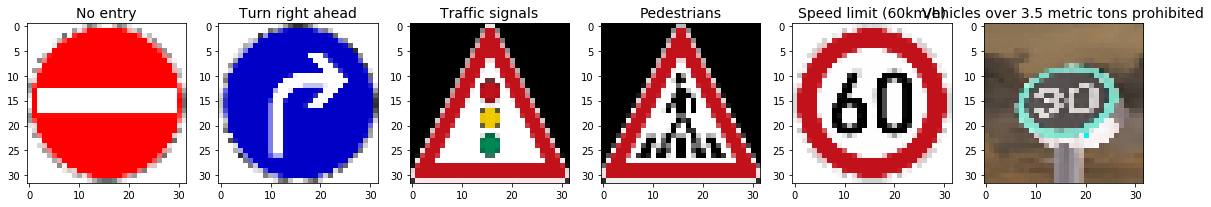

In [94]:
# Visualise predicted traffic sign labels
f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(20, 10))

ax1.imshow(images[0])
ax2.imshow(images[1])
ax3.imshow(images[2])
ax4.imshow(images[3])
ax5.imshow(images[4])
ax6.imshow(images[5])

ax1.set_title(sign_names[label_predictions[0][0]], fontsize=14)
ax2.set_title(sign_names[label_predictions[1][0]], fontsize=14)
ax3.set_title(sign_names[label_predictions[2][0]], fontsize=14)
ax4.set_title(sign_names[label_predictions[3][0]], fontsize=14)
ax5.set_title(sign_names[label_predictions[4][0]], fontsize=14)
ax6.set_title(sign_names[label_predictions[5][0]], fontsize=14)

plt.show()



### Analyze Performance

In [95]:
# Analyse Prediction performance on new images

test_labels = []
for labels in label_predictions:
    
    test_labels.append(labels[0])
    
    
true_labels = [17, 33, 26, 27, 3, 1]


print("Predicted Labels: ", test_labels)
print("True Labels:      ", true_labels)

correct_predictions = np.equal(test_labels, true_labels)

prediction_accuracy = (correct_predictions == True).sum() / len(correct_predictions)

print("Prediction Accuracy: {:.3f}%".format(prediction_accuracy * 100))



Predicted Labels:  [17, 33, 26, 27, 3, 16]
True Labels:       [17, 33, 26, 27, 3, 1]
Prediction Accuracy: 83.333%


### Softmax Probabilities

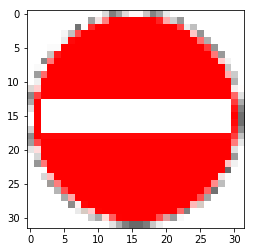

True Label:  No entry
No entry : 99.818%
Stop : 0.138%
Speed limit (20km/h) : 0.041%
Speed limit (30km/h) : 0.001%
Bicycles crossing : 0.001%


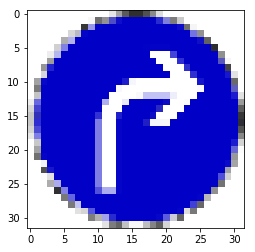

True Label:  Turn right ahead
Turn right ahead : 99.893%
Keep left : 0.066%
Roundabout mandatory : 0.022%
Ahead only : 0.018%
Turn left ahead : 0.000%


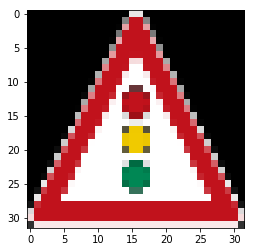

True Label:  Traffic signals
Traffic signals : 99.787%
General caution : 0.160%
Priority road : 0.047%
Road work : 0.003%
No entry : 0.002%


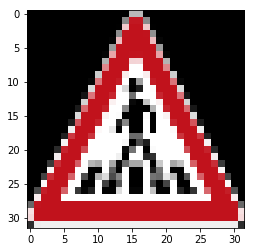

True Label:  Pedestrians
Pedestrians : 33.623%
General caution : 21.948%
Right-of-way at the next intersection : 13.276%
Road narrows on the right : 10.739%
Dangerous curve to the right : 5.823%


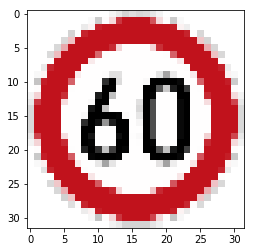

True Label:  Speed limit (60km/h)
Speed limit (60km/h) : 95.335%
Speed limit (80km/h) : 4.503%
Speed limit (50km/h) : 0.116%
Speed limit (30km/h) : 0.046%
End of speed limit (80km/h) : 0.000%


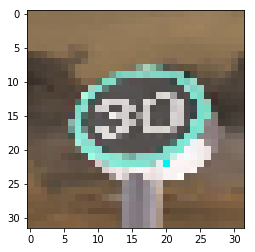

True Label:  Speed limit (30km/h)
Vehicles over 3.5 metric tons prohibited : 100.000%
Speed limit (20km/h) : 0.000%
Speed limit (30km/h) : 0.000%
Speed limit (50km/h) : 0.000%
Speed limit (60km/h) : 0.000%


In [96]:
def show_probabilities(index, label_probs=label_probs, label_predictions=label_predictions):
    
    labels_pred = label_predictions[index]
    labels_prob = label_probs[index][0]
    
    plt.imshow(images[index])
    plt.show()
    
    
    print("True Label: ", sign_names[true_labels[index]])
    
    
    for i in range(5):
        
        label_index = labels_pred[i]
        
        label = sign_names[label_index]
        
        print("{} : {:.3f}%".format(label, labels_prob[i] * 100))
    
    

show_probabilities(0)
show_probabilities(1)
show_probabilities(2)
show_probabilities(3)
show_probabilities(4)
show_probabilities(5)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### References

In [97]:
# https://www.tensorflow.org/programmers_guide/saved_model 
# https://www.tensorflow.org/tutorials/layers#generate_predictions
# https://stackoverflow.com/questions/44896288/how-to-use-tf-reset-default-graph
# https://stackoverflow.com/questions/40430186/tensorflow-valueerror-cannot-feed-value-of-shape-64-64-3-for-tensor-uplace
# https://discussions.udacity.com/t/how-to-actually-predict-the-class-of-an-image/222682/5
# https://discussions.udacity.com/t/import-of-web-image-changing-color/295447/2

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [98]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")